# meng 21200 pset 3

### init

In [458]:
import numpy as np
from scipy.interpolate import interp1d, CubicSpline, lagrange
from scipy.optimize import root_scalar
from scipy.interpolate import make_interp_spline as make
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5]
fx = [0,0.5,0.8,0.9,0.941176,0.961538]

def f(x):
    return (x**2)/(1+(x**2))

### problem 1

a

Solved analytically by hand, $$x=\sqrt{\frac{17}{3}}=2.380476$$

b

In [459]:
true_x = np.sqrt(17 / 3)
true_f = 0.85

F1 = interp1d(fx, x, kind='cubic')
inter_x = F1(0.85)
print(f'x from cubic interpolation = {inter_x}')
print(f'trpe = {100 * abs(true_x - inter_x)/true_x}%')

x from cubic interpolation = 2.3847111825292675
trpe = 0.17790725163851995%


c

In [460]:
def sub(x):
    return F2(x) - true_f

F2 = interp1d(x, fx, kind='quadratic')
inter_x = root_scalar(sub, bracket=[1, 3]).root
print(f'x from inverse quadratic interpolation = {inter_x}')
print(f'trpe = {100 * abs(true_x - inter_x)/true_x}%')

x from inverse quadratic interpolation = 2.3271668101571996
trpe = 2.2394399057764294%


d

In [461]:
def sub(x):
    return F3(x) - true_f

F3 = interp1d(x, fx, kind='cubic')
inter_x = root_scalar(sub, bracket=[1, 3]).root
print(f'x from inverse cubic interpolation = {inter_x}')
print(f'trpe = {100 * abs(true_x - inter_x)/true_x}%')

def bisection(g, x1, x2, tol, a=0):
    error = 100
    i = 0
    itLimit = 1000
    while error > tol and i < itLimit:
        i += 1
        approx = (x1 + x2) / 2
        if (g(x1)-a) * (g(approx)-a) < 0:
            x2 = approx
        else:
            x1 = approx
        error = (x2 - x1) / 2
    if i < itLimit:
        return approx

tol = 0.00000001
inter_x = bisection(f, x[0], x[-1], tol, 0.85)
print(f'x from bisection = {inter_x}')
print(f'trpe = {100 * abs(true_x - inter_x)/true_x}%')

x from inverse cubic interpolation = 2.337578668451287
trpe = 1.80205437156846%
x from bisection = 2.380476128309965
trpe = 6.107035170554234e-07%


e

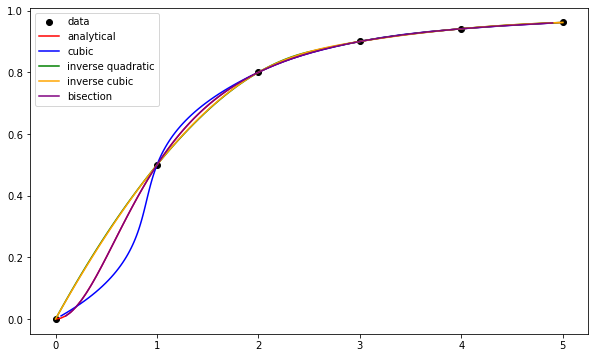

In [462]:
plt.figure(figsize = (10,6))

plt.scatter(x, fx, label='data', color='black')
xlist = np.linspace(0,5,100)
fxlist = np.linspace(0.01,0.96,100)

y1 = [f(i) for i in xlist]
plt.plot(xlist, y1, label='analytical', color='red')

y2 = [F1(i) for i in fxlist]
plt.plot(y2, fxlist, label='cubic', color='blue')

y3 = [F2(i) for i in xlist]
plt.plot(xlist, y3, label='inverse quadratic', color='green')

y4 = [F3(i) for i in xlist]
plt.plot(xlist, y4, label='inverse cubic', color='orange')

y5 = [bisection(f, x[0], x[-1], tol, i) for i in fxlist]
plt.plot(y5, fxlist, label='bisection', color='purple')

plt.legend(loc='best')

### problem 2

a

In [463]:
def five(x, y):
    return make(x, y, k = 2)

b

In [464]:
x = [i for i in range(1,6)]
y = [np.sin(i) for i in x]
spline = five(x, y)

c

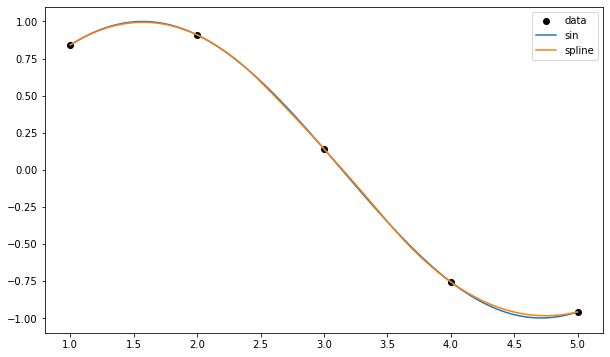

In [465]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='data', color='black')
xlist = np.linspace(1,5,100)
plt.plot(xlist, np.sin(xlist), label='sin')
plt.plot(xlist, spline(xlist), label='spline')
plt.legend()

d

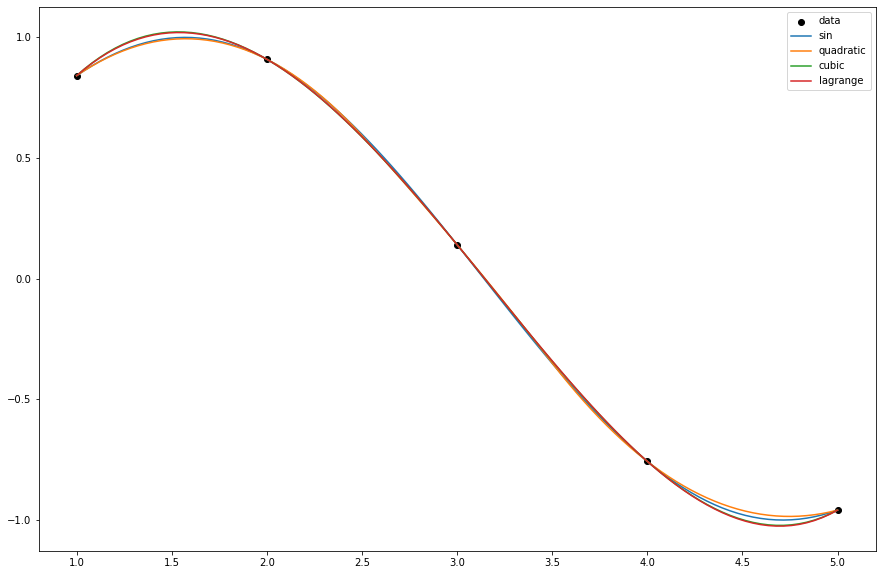

In [466]:
cubic = CubicSpline(x, y)
lag = lagrange(x, y)

plt.figure(figsize=(15, 10))
plt.scatter(x, y, label='data', color='black')
xlist = np.linspace(1,5,100)
plt.plot(xlist, np.sin(xlist), label='sin')
plt.plot(xlist, spline(xlist), label='quadratic')
plt.plot(xlist, cubic(xlist), label='cubic')
plt.plot(xlist, lag(xlist), label='lagrange')

plt.legend()

Cubic and Lagrange produce very similar curves, while quadratic is only similar to them in the central regions (between points 2 and 4). Overall, quadratic spline seems to fit the analytic curve better, especially between points 1 and 2.